In [36]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn 
import torch.nn.functional as F 

from torchvision import transforms, datasets
from matplotlib import pyplot as plt


In [3]:
training_data = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing_data = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


3.3%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100.0%
13.9%

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100.0%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [4]:
training_dataset = torch.utils.data.DataLoader(training_data,batch_size=10,shuffle=True)
testing_dataset = torch.utils.data.DataLoader(testing_data,batch_size=10,shuffle=True)

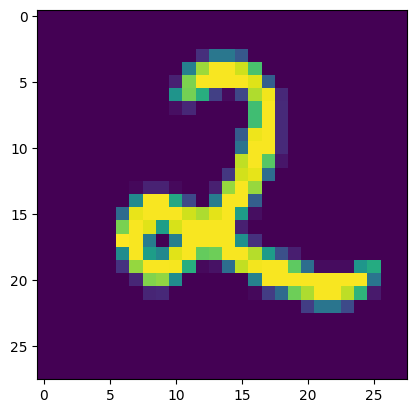

In [41]:
# print(len(training_dataset))

for t in training_dataset:
    # print(t)
    break
plt.imshow(t[0][0].view(28,28))

In [47]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(28*28,64)
        self.hidden_layer1 = nn.Linear(64,64)
        self.hidden_layer2 = nn.Linear(64,64)
        self.output_layer = nn.Linear(64,10)

    def forward(self,data):
        data = F.relu(self.input_layer(data))
        data = F.relu(self.hidden_layer1(data))
        data = F.relu(self.hidden_layer2(data))
        data = self.output_layer(data)
        return F.log_softmax(data)

my_network = MyNetwork()
optimizer = optim.Adam(my_network.parameters(),lr=0.001)

EPOCHS = 3



In [75]:
for epoch in range(EPOCHS):
    for data in training_dataset:
        pictures, answers = data
        my_network.zero_grad()
        result = my_network(pictures.view(-1,28*28))
        loss = F.nll_loss(result,answers)
        loss.backward()
        optimizer.step()
    print(loss)

C:\Users\luche\AppData\Local\Temp\ipykernel_8552\3766030156.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(data)


tensor(0.0001124767, grad_fn=<NllLossBackward0>)
tensor(3.4232674807e-05, grad_fn=<NllLossBackward0>)
tensor(8.2809674495e-05, grad_fn=<NllLossBackward0>)


In [65]:
# torch.set_printoptions(precision=10)

C:\Users\luche\AppData\Local\Temp\ipykernel_8552\3766030156.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(data)


tensor([[-1.1482724190e+01, -1.3865279198e+01, -1.1586379051e+01,
         -4.6409521103e+00, -8.5679893494e+00, -7.7681503296e+00,
         -1.7923656464e+01, -1.1765278816e+01, -7.1719765663e+00,
         -1.1119305156e-02]], grad_fn=<LogSoftmaxBackward0>)
tensor(9)


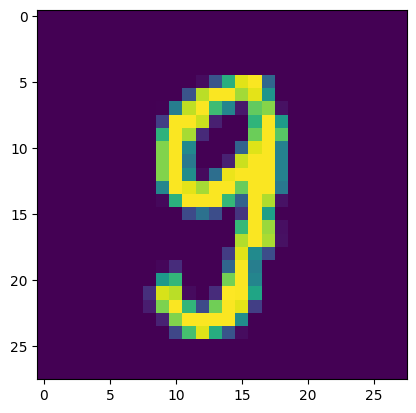

In [66]:
plt.imshow(data[0][0].view(28,28))
print(my_network(data[0][0].view(-1,28*28)))
print(data[1][0])

In [73]:
correct = 0
total = 0
with torch.no_grad():
    for data in testing_dataset:
        pictures, answers = data
        result = my_network(pictures.view(-1,28*28))
        for index, res in enumerate(result):
            if(torch.argmax(res)==answers[index]):
                correct+=1
            total+=1
print(correct/total*100)

C:\Users\luche\AppData\Local\Temp\ipykernel_8552\3766030156.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(data)


97.17


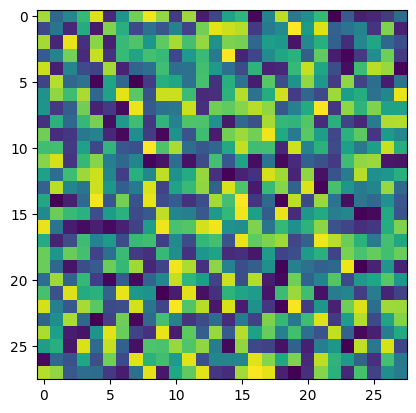

In [46]:
plt.imshow(torch.rand((28,28)))